<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خوشه قطعه‌ها
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    توضیحات
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این تمرین قصد داریم تا با استفاده از روش‌های قطعه‌بندی مبتنی بر خوشه‌بندی که تا کنون آموخته‌ایم، قطعه‌بندی را برای دو تصویر زیر که در پوشه داده‌های تمرین قرار دارند، انجام دهیم.
    <br>
    Data/butterfly.jpg
    <br>
    Data/elephant.jpg
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    ابتدا هر دو تصویر را در حوزه RGB وارد کنید. همچنین قطعه‌بندی خود را در همین حوزه انجام دهید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از اینکه قطعه‌بندی انجام شد، نتیجه قطعه‌بندی را در حوزه خاکستری ذخیره کنید. نتیجه قطعه‌بندی را در تصاویری با نام زیر ذخیره کنید:
    <br>
    butterfly_segmentation.tif
    <br>
    elephant_segmentation.tif
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نهایت سلول جواب‌ساز را اجرا کنید تا نتایج پیاده‌سازی شما به همراه تصاویر قطعه‌بندی در یک فایل zip ذخیره شوند.
</font>
</p>

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

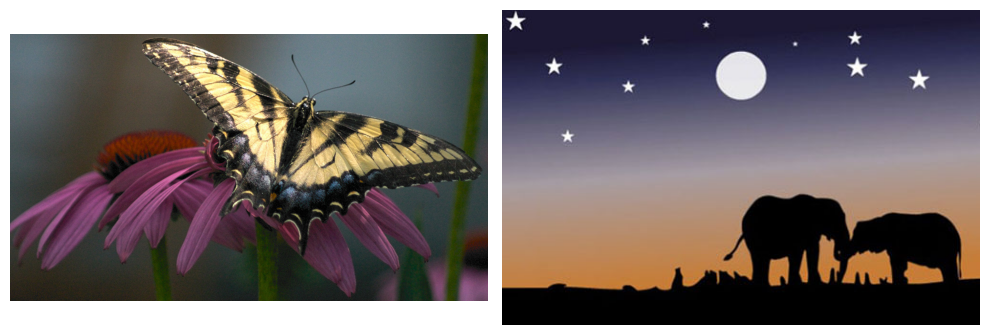

In [37]:
img_butterfly = cv2.imread("./Data/butterfly.jpg")
img_butterfly = cv2.cvtColor(img_butterfly, cv2.COLOR_BGR2RGB)

img_elephant = cv2.imread("./Data/elephant.jpg")
img_elephant = cv2.cvtColor(img_elephant, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))


plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_butterfly)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_elephant)

plt.tight_layout()
plt.show()

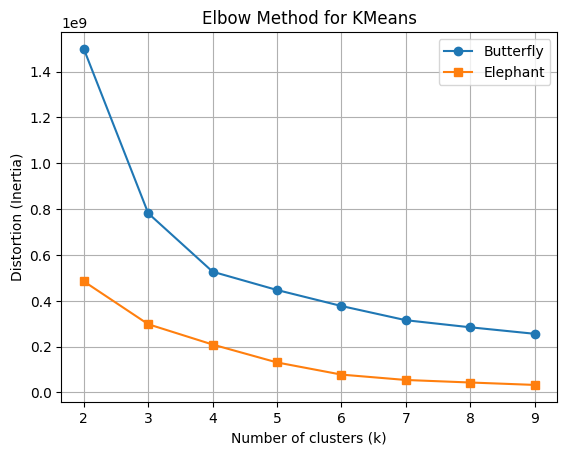

In [38]:
distortions_butterfly = []
distortions_elephant = []

K_values = range(2, 10)
pixels_butterfly = img_butterfly.reshape((-1, 3))
pixels_elephant = img_elephant.reshape((-1, 3))

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels_butterfly)
    distortions_butterfly.append(kmeans.inertia_)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels_elephant)
    distortions_elephant.append(kmeans.inertia_)

plt.plot(K_values, distortions_butterfly, marker="o", label="Butterfly")
plt.plot(K_values, distortions_elephant, marker="s", label="Elephant")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for KMeans")
plt.legend()
plt.grid(True)
plt.show()

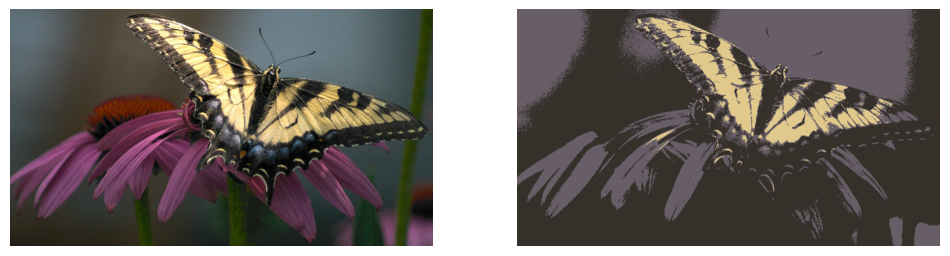

In [39]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels_butterfly)

segmented_image_butterfly = (
    kmeans.cluster_centers_[labels].reshape(img_butterfly.shape).astype(np.uint8)
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_butterfly)
ax[0].axis("off")
ax[1].imshow(segmented_image_butterfly)
ax[1].axis("off")
plt.show()

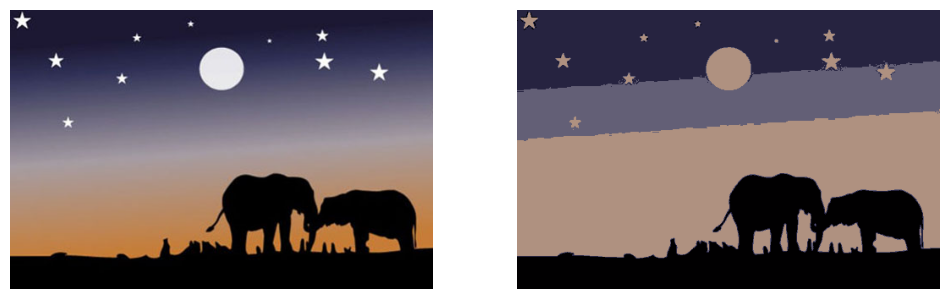

In [40]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels_elephant)

segmented_image_elephant = (
    kmeans.cluster_centers_[labels].reshape(img_elephant.shape).astype(np.uint8)
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_elephant)
ax[0].axis("off")
ax[1].imshow(segmented_image_elephant)
ax[1].axis("off")
plt.show()

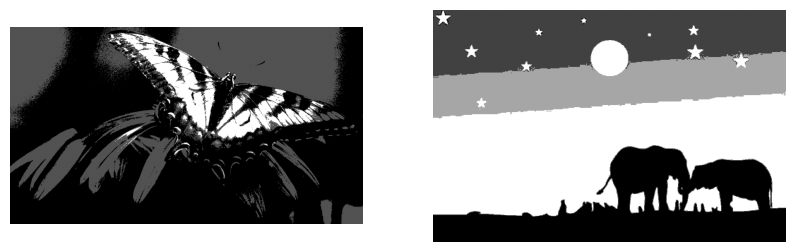

In [41]:
gray_butterfly = cv2.cvtColor(segmented_image_butterfly, cv2.COLOR_RGB2GRAY)
gray_elephant = cv2.cvtColor(segmented_image_elephant, cv2.COLOR_RGB2GRAY)

cv2.imwrite("butterfly_segmentation.tif", gray_butterfly)
cv2.imwrite("elephant_segmentation.tif", gray_elephant)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_butterfly, "gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_elephant, "gray")
plt.axis("off")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [42]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "butterfly_segmentation.tif", "elephant_segmentation.tif"]
compress(file_names)

File Paths:
['notebook.ipynb', 'butterfly_segmentation.tif', 'elephant_segmentation.tif']
